In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/ecoli-uci-dataset/ecoli.csv')
df

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [3]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQUENCE_NAME  336 non-null    object 
 1   MCG            336 non-null    float64
 2   GVH            336 non-null    float64
 3   LIP            336 non-null    float64
 4   CHG            336 non-null    float64
 5   AAC            336 non-null    float64
 6   ALM1           336 non-null    float64
 7   ALM2           336 non-null    float64
 8   SITE           336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


In [4]:
#Creating preproccsing file
def preprocessing_input(df):
    df=df.copy()

    #dropping the sequence_name column
    df=df.drop('SEQUENCE_NAME',axis=1)

    df['SITE']=df['SITE'].apply(lambda x:x if x=='cp' else 'other')

    #splitting the data between x and y
    y=df['SITE']
    x=df.drop('SITE',axis=1)

    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)

    #Scaling the dataset
    scaler=MinMaxScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)    

    return x_train,x_test,y_train,y_test

In [5]:
x_train,x_test,y_train,y_test=preprocessing_input(df)
x_train

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
216,0.337079,0.416667,0.0,0.0,0.477273,0.637363,0.354839
298,0.719101,0.666667,0.0,0.0,0.556818,0.428571,0.193548
220,0.955056,0.440476,0.0,0.0,0.602273,0.538462,0.365591
246,0.853933,0.297619,0.0,0.0,0.568182,0.615385,0.655914
24,0.404494,0.273810,0.0,0.0,0.545455,0.208791,0.236559
...,...,...,...,...,...,...,...
83,0.382022,0.464286,0.0,0.0,0.659091,0.307692,0.430108
17,0.494382,0.130952,0.0,0.0,0.625000,0.538462,0.612903
230,0.842697,0.250000,0.0,0.0,0.727273,0.736264,0.784946
98,0.730337,0.464286,0.0,0.0,0.386364,0.373626,0.290323


In [6]:
x_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.568683,0.411145,0.029787,0.004255,0.573356,0.507412,0.514573
std,0.223204,0.186418,0.170363,0.065233,0.145500,0.230088,0.219730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382022,0.279762,0.000000,0.000000,0.477273,0.329670,0.354839
50%,0.573034,0.380952,0.000000,0.000000,0.568182,0.461538,0.451613
75%,0.752809,0.488095,0.000000,0.000000,0.647727,0.703297,0.720430
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y_train.value_counts()

SITE
other    134
cp       101
Name: count, dtype: int64

In [8]:
y_test.value_counts()

SITE
other    59
cp       42
Name: count, dtype: int64

In [9]:
#training the dataset
model=LogisticRegression()
model.fit(x_train,y_train)
print('Test Accuracy:{:.2f}%'.format(model.score(x_test,y_test)*100))

Test Accuracy:99.01%


In [10]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[41,  1],
       [ 0, 59]])

In [11]:
model.classes_

array(['cp', 'other'], dtype=object)

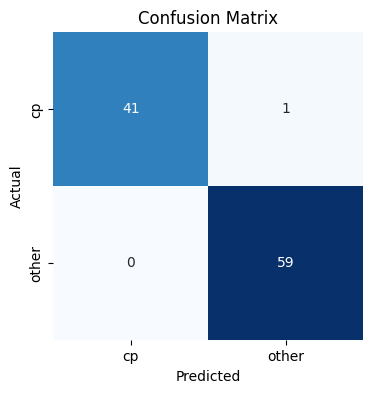

In [12]:
#Plotting the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,vmin=0,cmap='Blues',cbar=False)
plt.xticks(np.arange(2)+0.5,model.classes_)
plt.yticks(np.arange(2)+0.5,model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
y_pred

array(['cp', 'other', 'other', 'other', 'other', 'cp', 'other', 'cp',
       'other', 'cp', 'cp', 'other', 'other', 'other', 'cp', 'other',
       'cp', 'other', 'cp', 'other', 'other', 'other', 'cp', 'other',
       'other', 'other', 'other', 'cp', 'other', 'cp', 'cp', 'cp',
       'other', 'cp', 'other', 'cp', 'other', 'other', 'cp', 'other',
       'cp', 'other', 'other', 'cp', 'other', 'other', 'other', 'other',
       'other', 'cp', 'other', 'other', 'cp', 'cp', 'other', 'other',
       'other', 'cp', 'other', 'other', 'cp', 'cp', 'other', 'other',
       'cp', 'cp', 'other', 'other', 'other', 'cp', 'other', 'other',
       'other', 'cp', 'other', 'cp', 'cp', 'cp', 'other', 'other', 'cp',
       'other', 'other', 'cp', 'cp', 'cp', 'other', 'other', 'cp',
       'other', 'cp', 'other', 'cp', 'other', 'cp', 'other', 'other',
       'other', 'other', 'cp', 'cp'], dtype=object)